In [1]:
import random
import time
import sqlite3
from datetime import datetime


In [2]:
conn = sqlite3.connect("sensor_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS temperature (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    value REAL,
    timestamp TEXT
)
""")

conn.commit()


In [3]:
# emulation
for _ in range(30):
    temp = round(random.uniform(20, 30), 2)
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    cursor.execute(
        "INSERT INTO temperature (value, timestamp) VALUES (?, ?)",
        (temp, timestamp)
    )
    conn.commit()

    time.sleep(1)

print("Data collection finished")


Data collection finished


In [4]:
import pandas as pd

df = pd.read_sql("SELECT * FROM temperature", conn)
df.head()


,id,value,timestamp
0,1,21.18,2026-01-03 09:19:39
1,2,25.41,2026-01-03 09:19:40
2,3,23.53,2026-01-03 09:19:41
3,4,20.74,2026-01-03 09:19:42
4,5,21.95,2026-01-03 09:19:43


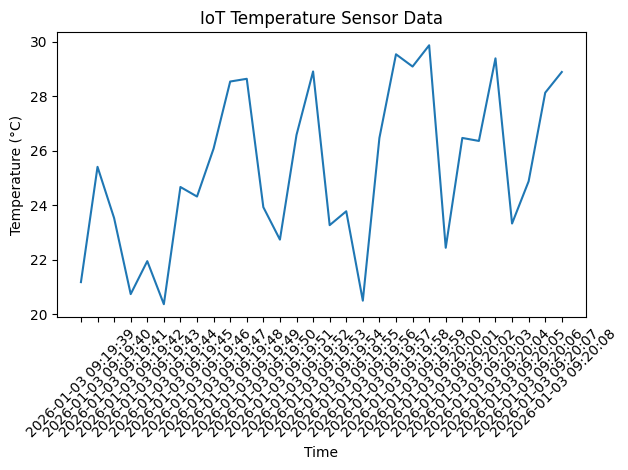

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df["timestamp"], df["value"])
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("IoT Temperature Sensor Data")
plt.tight_layout()
plt.show()
